# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)


b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    1.730509
b    0.789290
c   -1.516810
d    0.551807
e   -0.034971
dtype: float64
a         NaN
b    1.578580
c   -3.033619
d    1.103614
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date, type(date))

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date, type(date))

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-22
2020-11-09 14:45:10.000015 <class 'datetime.datetime'>
9/11/2020 14:45:00 <class 'str'>
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
 

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)
print(tstamp.microsecond)
print(tstamp.second)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1970-01-01 00:00:00.000001
1000
1
0
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print(len(tseries))
print (tseries[0:4], '\n')
print (tseries['2020-9-11':'2020-09-13'], '\n') # Note - includes end time


7
2020-09-11 14:45:00    11.345365
2020-09-12 14:45:00    10.374382
2020-09-13 14:45:00     9.369574
2020-09-14 14:45:00    11.109143
Freq: D, dtype: float64 

2020-09-11 14:45:00    11.345365
2020-09-12 14:45:00    10.374382
2020-09-13 14:45:00     9.369574
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2020-11-09 14:45:00,1.240201,0.410467,-1.647325,2.220378
2020-11-09 15:45:00,-2.145162,-0.468231,-0.431753,0.568059
2020-11-09 16:45:00,-0.982102,0.683688,0.500763,0.332916
2020-11-09 17:45:00,0.539599,0.536000,-1.907390,0.810267
2020-11-09 18:45:00,-1.928696,-0.645198,-1.802834,-0.410368
2020-11-09 19:45:00,-0.741162,0.745298,0.102866,-1.110614
2020-11-09 20:45:00,-0.353068,-0.703289,0.930803,1.453101
2020-11-09 21:45:00,0.427875,-0.841860,-0.914375,0.632822
2020-11-09 22:45:00,-0.597281,1.478180,-0.138357,-0.660361
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,0.141101


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,1.240201,0.410467,-1.647325,2.220378
2020-11-09 15:45:00,-2.145162,-0.468231,-0.431753,0.568059
2020-11-09 16:45:00,-0.982102,0.683688,0.500763,0.332916
2020-11-09 17:45:00,0.539599,0.536000,-1.907390,0.810267
2020-11-09 18:45:00,-1.928696,-0.645198,-1.802834,-0.410368


In [13]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,-0.353068,-0.703289,0.930803,1.453101
2020-11-09 21:45:00,0.427875,-0.841860,-0.914375,0.632822
2020-11-09 22:45:00,-0.597281,1.478180,-0.138357,-0.660361
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,0.141101


In [14]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 1.24020114,  0.41046651, -1.64732531,  2.22037835],
       [-2.1451618 , -0.46823102, -0.43175309,  0.56805899],
       [-0.98210179,  0.68368792,  0.50076262,  0.33291572],
       [ 0.53959906,  0.53600019, -1.90739009,  0.81026725],
       [-1.92869558, -0.64519839, -1.80283362, -0.41036782],
       [-0.74116231,  0.74529783,  0.10286623, -1.11061424],
       [-0.35306765, -0.70328854,  0.93080336,  1.45310144],
       [ 0.4278755 , -0.84185999, -0.91437464,  0.63282175],
       [-0.59728097,  1.47818008, -0.13835674, -0.66036085],
       [ 0.08789138,  0.25126498, -1.5565454 ,  0.14110134]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.445190,0.144632,-0.686415,0.397730
std,1.072637,0.771471,1.026460,0.989279
min,-2.145162,-0.841860,-1.907390,-1.110614
25%,-0.921867,-0.600957,-1.624630,-0.272501
50%,-0.475174,0.330866,-0.673064,0.450487
75%,0.342879,0.646766,0.042560,0.765906
max,1.240201,1.478180,0.930803,2.220378


In [18]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,1.240201,-2.145162,-0.982102,0.539599,-1.928696,-0.741162,-0.353068,0.427875,-0.597281,0.087891
B,0.410467,-0.468231,0.683688,0.536000,-0.645198,0.745298,-0.703289,-0.841860,1.478180,0.251265
C,-1.647325,-0.431753,0.500763,-1.907390,-1.802834,0.102866,0.930803,-0.914375,-0.138357,-1.556545
D,2.220378,0.568059,0.332916,0.810267,-0.410368,-1.110614,1.453101,0.632822,-0.660361,0.141101


In [19]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,2.220378,-1.647325,0.410467,1.240201
2020-11-09 15:45:00,0.568059,-0.431753,-0.468231,-2.145162
2020-11-09 16:45:00,0.332916,0.500763,0.683688,-0.982102
2020-11-09 17:45:00,0.810267,-1.907390,0.536000,0.539599
2020-11-09 18:45:00,-0.410368,-1.802834,-0.645198,-1.928696
2020-11-09 19:45:00,-1.110614,0.102866,0.745298,-0.741162
2020-11-09 20:45:00,1.453101,0.930803,-0.703289,-0.353068
2020-11-09 21:45:00,0.632822,-0.914375,-0.841860,0.427875
2020-11-09 22:45:00,-0.660361,-0.138357,1.478180,-0.597281
2020-11-09 23:45:00,0.141101,-1.556545,0.251265,0.087891


In [20]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 17:45:00,0.539599,0.536000,-1.907390,0.810267
2020-11-09 18:45:00,-1.928696,-0.645198,-1.802834,-0.410368
2020-11-09 14:45:00,1.240201,0.410467,-1.647325,2.220378
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,0.141101
2020-11-09 21:45:00,0.427875,-0.841860,-0.914375,0.632822
2020-11-09 15:45:00,-2.145162,-0.468231,-0.431753,0.568059
2020-11-09 22:45:00,-0.597281,1.478180,-0.138357,-0.660361
2020-11-09 19:45:00,-0.741162,0.745298,0.102866,-1.110614
2020-11-09 16:45:00,-0.982102,0.683688,0.500763,0.332916
2020-11-09 20:45:00,-0.353068,-0.703289,0.930803,1.453101


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00    1.240201
2020-11-09 15:45:00   -2.145162
2020-11-09 16:45:00   -0.982102
2020-11-09 17:45:00    0.539599
2020-11-09 18:45:00   -1.928696
2020-11-09 19:45:00   -0.741162
2020-11-09 20:45:00   -0.353068
2020-11-09 21:45:00    0.427875
2020-11-09 22:45:00   -0.597281
2020-11-09 23:45:00    0.087891
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    1.240201
2020-11-09 15:45:00   -2.145162
2020-11-09 16:45:00   -0.982102
2020-11-09 17:45:00    0.539599
2020-11-09 18:45:00   -1.928696
2020-11-09 19:45:00   -0.741162
2020-11-09 20:45:00   -0.353068
2020-11-09 21:45:00    0.427875
2020-11-09 22:45:00   -0.597281
2020-11-09 23:45:00    0.087891
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00  1.240201  0.410467 -1.647325  2.220378
2020-11-09 15:45:00 -2.145162 -0.468231 -0.431753  0.568059
2020-11-09 16:45:00 -0.982102  0.683688  0.500763  0.332916
                            A         B         C         D
2020-11-09 14:45:00  1.240201  0.410467 -1.647325  2.220378
2020-11-09 15:45:00 -2.145162 -0.468231 -0.431753  0.568059
2020-11-09 16:45:00 -0.982102  0.683688  0.500763  0.332916


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.240201
B    0.410467
C   -1.647325
D    2.220378
Name: 2020-11-09 14:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2020-11-09 14:45:00,1.240201,0.410467
2020-11-09 15:45:00,-2.145162,-0.468231
2020-11-09 16:45:00,-0.982102,0.683688
2020-11-09 17:45:00,0.539599,0.536000
2020-11-09 18:45:00,-1.928696,-0.645198
2020-11-09 19:45:00,-0.741162,0.745298
2020-11-09 20:45:00,-0.353068,-0.703289
2020-11-09 21:45:00,0.427875,-0.841860
2020-11-09 22:45:00,-0.597281,1.478180
2020-11-09 23:45:00,0.087891,0.251265


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,-1.928696,-0.645198
2020-11-09 19:45:00,-0.741162,0.745298
2020-11-09 20:45:00,-0.353068,-0.703289


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-2.1451617954804734
-2.1451617954804734


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.539599
B    0.536000
C   -1.907390
D    0.810267
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  0.539599  0.536000
2020-11-09 18:45:00 -1.928696 -0.645198


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,-2.145162,-0.431753
2020-11-09 16:45:00,-0.982102,0.500763
2020-11-09 18:45:00,-1.928696,-1.802834


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00 -2.145162 -0.468231 -0.431753  0.568059
2020-11-09 16:45:00 -0.982102  0.683688  0.500763  0.332916 

                            B         C
2020-11-09 14:45:00  0.410467 -1.647325
2020-11-09 15:45:00 -0.468231 -0.431753
2020-11-09 16:45:00  0.683688  0.500763
2020-11-09 17:45:00  0.536000 -1.907390
2020-11-09 18:45:00 -0.645198 -1.802834
2020-11-09 19:45:00  0.745298  0.102866
2020-11-09 20:45:00 -0.703289  0.930803
2020-11-09 21:45:00 -0.841860 -0.914375
2020-11-09 22:45:00  1.478180 -0.138357
2020-11-09 23:45:00  0.251265 -1.556545


In [30]:
# selecting an individual element by position
print(df.iloc[1,1])
print(df.iat[1,1])


-0.46823101516068133
-0.46823101516068133


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,1.240201,0.410467,-1.647325,2.220378
2020-11-09 16:45:00,-0.982102,0.683688,0.500763,0.332916
2020-11-09 17:45:00,0.539599,0.536000,-1.907390,0.810267
2020-11-09 19:45:00,-0.741162,0.745298,0.102866,-1.110614
2020-11-09 22:45:00,-0.597281,1.478180,-0.138357,-0.660361
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,0.141101


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,1.240201,0.410467,NaN,2.220378
2020-11-09 15:45:00,NaN,NaN,NaN,0.568059
2020-11-09 16:45:00,NaN,0.683688,0.500763,0.332916
2020-11-09 17:45:00,0.539599,0.536000,NaN,0.810267
2020-11-09 18:45:00,NaN,NaN,NaN,NaN
2020-11-09 19:45:00,NaN,0.745298,0.102866,NaN
2020-11-09 20:45:00,NaN,NaN,0.930803,1.453101
2020-11-09 21:45:00,0.427875,NaN,NaN,0.632822
2020-11-09 22:45:00,NaN,1.478180,NaN,NaN
2020-11-09 23:45:00,0.087891,0.251265,NaN,0.141101


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
print(len(df)==len(dates))
df

True


,A,B,C,D,E,E prime
2020-11-09 14:45:00,0.000000,0.410467,-1.647325,5,0.0,0
2020-11-09 15:45:00,-2.145162,-0.468231,-0.431753,5,0.5,2
2020-11-09 16:45:00,-0.982102,0.683688,0.500763,5,1.0,4
2020-11-09 17:45:00,0.539599,0.536000,-1.907390,5,1.5,6
2020-11-09 18:45:00,-1.928696,-0.645198,-1.802834,5,2.0,8
2020-11-09 19:45:00,-0.741162,0.745298,0.102866,5,2.5,10
2020-11-09 20:45:00,-0.353068,-0.703289,0.930803,5,3.0,12
2020-11-09 21:45:00,0.427875,-0.841860,-0.914375,5,3.5,14
2020-11-09 22:45:00,-0.597281,1.478180,-0.138357,5,4.0,16
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,5,4.5,18


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.410467,-1.647325,5,0.0,0,1.000000
2020-11-09 15:45:00,-2.145162,-0.468231,-0.431753,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.982102,0.683688,0.500763,5,1.0,4,0.999848
2020-11-09 17:45:00,0.539599,0.536000,-1.907390,5,1.5,6,0.999657
2020-11-09 18:45:00,-1.928696,-0.645198,-1.802834,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.741162,0.745298,0.102866,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.353068,-0.703289,0.930803,5,3.0,12,0.998630
2020-11-09 21:45:00,0.427875,-0.841860,-0.914375,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.597281,1.478180,-0.138357,5,4.0,16,0.997564
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.410467,-1.647325,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-2.145162,-0.468231,-0.431753,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-0.982102,-0.683688,-0.500763,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-0.539599,-0.536000,-1.907390,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-1.928696,-0.645198,-1.802834,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.741162,-0.745298,-0.102866,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.353068,-0.703289,-0.930803,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.427875,-0.841860,-0.914375,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.597281,-1.478180,-0.138357,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.087891,-0.251265,-1.556545,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,0.410467,-1.647325,5,0.0,1.000000
2020-11-09 15:45:00,-2.145162,-0.468231,-0.431753,5,0.5,0.999962
2020-11-09 16:45:00,-0.982102,0.683688,0.500763,5,1.0,0.999848
2020-11-09 17:45:00,0.539599,0.536000,-1.907390,5,1.5,0.999657
2020-11-09 18:45:00,-1.928696,-0.645198,-1.802834,5,2.0,0.999391
2020-11-09 19:45:00,-0.741162,0.745298,0.102866,5,2.5,0.999048
2020-11-09 20:45:00,-0.353068,-0.703289,0.930803,5,3.0,0.998630
2020-11-09 21:45:00,0.427875,-0.841860,-0.914375,5,3.5,0.998135
2020-11-09 22:45:00,-0.597281,1.478180,-0.138357,5,4.0,0.997564
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,5,4.5,0.996917


In [38]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.410467,-1.647325,5,0.0,0,1.000000
2020-11-09 19:45:00,-0.741162,0.745298,0.102866,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.353068,-0.703289,0.930803,5,3.0,12,0.998630
2020-11-09 21:45:00,0.427875,-0.841860,-0.914375,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.597281,1.478180,-0.138357,5,4.0,16,0.997564
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,5,4.5,18,0.996917


In [39]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.410467,-1.647325,5,0.0,0,1.000000
2020-11-09 15:45:00,-2.145162,-0.468231,-0.431753,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.982102,0.683688,0.500763,5,1.0,4,0.999848
2020-11-09 17:45:00,0.539599,0.536000,-1.907390,5,1.5,6,0.999657
2020-11-09 18:45:00,-1.928696,-0.645198,-1.802834,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.741162,0.745298,0.102866,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.353068,-0.703289,0.930803,5,3.0,12,0.998630
2020-11-09 21:45:00,0.427875,-0.841860,-0.914375,5,3.5,14,0.998135
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [40]:
df_wNan = df[df>0]
#display(df)   #df unchanged
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.410467,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,NaN,NaN,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,NaN,0.683688,0.500763,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.539599,0.536000,NaN,5,1.5,6.0,0.999657
2020-11-09 18:45:00,NaN,NaN,NaN,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,0.745298,0.102866,5,2.5,10.0,0.999048
2020-11-09 20:45:00,NaN,NaN,0.930803,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.427875,NaN,NaN,5,3.5,14.0,0.998135
2020-11-09 22:45:00,NaN,1.478180,NaN,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.087891,0.251265,NaN,5,4.5,18.0,0.996917


In [41]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [42]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,True,False,True,True,False
2020-11-09 15:45:00,True,True,True,False,False,False,False
2020-11-09 16:45:00,True,False,False,False,False,False,False
2020-11-09 17:45:00,False,False,True,False,False,False,False
2020-11-09 18:45:00,True,True,True,False,False,False,False
2020-11-09 19:45:00,True,False,False,False,False,False,False
2020-11-09 20:45:00,True,True,False,False,False,False,False
2020-11-09 21:45:00,False,True,True,False,False,False,False
2020-11-09 22:45:00,True,False,True,False,False,False,False
2020-11-09 23:45:00,False,False,True,False,False,False,False


In [43]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.410467,0.000000,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.000000,0.000000,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.000000,0.683688,0.500763,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.539599,0.536000,0.000000,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.000000,0.000000,0.000000,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,0.745298,0.102866,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.000000,0.000000,0.930803,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.427875,0.000000,0.000000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.000000,1.478180,0.000000,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.087891,0.251265,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [44]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.410467,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,NaN,0.410467,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,NaN,0.683688,0.500763,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.539599,0.536000,0.500763,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.539599,0.536000,0.500763,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.539599,0.745298,0.102866,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.539599,0.745298,0.930803,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.427875,0.745298,0.930803,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.427875,1.478180,0.930803,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.087891,0.251265,0.930803,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [45]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.569210
B          0.144632
C         -0.686415
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.680449
2020-11-09 15:45:00    0.779259
2020-11-09 16:45:00    1.600314
2020-11-09 17:45:00    1.809695
2020-11-09 18:45:00    1.660380
2020-11-09 19:45:00    2.658007
2020-11-09 20:45:00    2.981868
2020-11-09 21:45:00    3.167111
2020-11-09 22:45:00    3.820015
2020-11-09 23:45:00    3.897075
Freq: H, dtype: float64 



In [50]:
# global operations on columns
df.apply(np.cumsum) # apply a funcion to a given axis, 
                    # default axis=0     
                    # Axis along which the function is applied:
                    #              0 or ‘index’: apply function to each column.
                    #              1 or ‘columns’: apply function to each row.



,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.410467,-1.647325,5,0.0,0,1.000000
2020-11-09 15:45:00,-2.145162,-0.057765,-2.079078,10,0.5,2,1.999962
2020-11-09 16:45:00,-3.127264,0.625923,-1.578316,15,1.5,6,2.999810
2020-11-09 17:45:00,-2.587665,1.161924,-3.485706,20,3.0,12,3.999467
2020-11-09 18:45:00,-4.516360,0.516725,-5.288539,25,5.0,20,4.998858
2020-11-09 19:45:00,-5.257522,1.262023,-5.185673,30,7.5,30,5.997906
2020-11-09 20:45:00,-5.610590,0.558735,-4.254870,35,10.5,42,6.996536
2020-11-09 21:45:00,-5.182715,-0.283125,-5.169245,40,14.0,56,7.994670
2020-11-09 22:45:00,-5.779996,1.195055,-5.307601,45,18.0,72,8.992234
2020-11-09 23:45:00,-5.692104,1.446320,-6.864147,50,22.5,90,9.989152


In [47]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.410467,-1.647325,5,0.0,0,1.000000
2020-11-09 15:45:00,-2.145162,-0.468231,-0.431753,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.982102,0.683688,0.500763,5,1.0,4,0.999848
2020-11-09 17:45:00,0.539599,0.536000,-1.907390,5,1.5,6,0.999657
2020-11-09 18:45:00,-1.928696,-0.645198,-1.802834,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.741162,0.745298,0.102866,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.353068,-0.703289,0.930803,5,3.0,12,0.998630
2020-11-09 21:45:00,0.427875,-0.841860,-0.914375,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.597281,1.478180,-0.138357,5,4.0,16,0.997564
2020-11-09 23:45:00,0.087891,0.251265,-1.556545,5,4.5,18,0.996917


In [48]:
df.apply(lambda x: x.max() - x.min())
#df.apply(lambda x: np.max(x) - np.min(x))

A           2.684761
B           2.320040
C           2.838193
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [49]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    0.410467
2020-11-09 15:45:00   -2.613393
2020-11-09 16:45:00   -0.298414
2020-11-09 17:45:00    1.075599
2020-11-09 18:45:00   -2.573894
2020-11-09 19:45:00    0.004136
2020-11-09 20:45:00   -1.056356
2020-11-09 21:45:00   -0.413984
2020-11-09 22:45:00    0.880899
2020-11-09 23:45:00    0.339156
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [103]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!mkdir data
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

file_name="./data/data_000637.txt"
data=pd.read_csv(file_name)
data

--2020-11-22 17:29:13--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2020-11-22 17:29:13--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc2b0234d1bdc4c0e94bff40eb23.dl.dropboxusercontent.com/cd/0/inline/BDtihgVq9SIobiTkxp48xmHrW8y_Pyz3fjqRAnd6L-XsLNHURv4Eypb7XMuMMwBSQi5-xzjlaQuQ2c5-h7KKkOQroPEIXakbNAEGneoGofmK2vNRwQj1FScmncTMmkdwvEE/file# [segue]
--2020-11-22 17:29:14--  https://uc2b0234d1bdc4c0e94bff40eb23.dl.dropboxusercontent.com/cd/0/inline/BDtihgVq9SIobiTkxp48xmHrW8y_Pyz3fjqRAnd6L-XsLNHURv4Eypb7XMuMMwBSQi5-xzjlaQuQ

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [104]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [107]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.015910,1.003915,0.080820,0.622216
1,0.498779,0.994594,0.769127,-0.031216
2,1.904311,0.039621,0.633355,0.541486
3,-0.907082,2.201120,-0.456955,-0.351611
4,1.605231,-0.460676,-0.878487,1.499453
5,0.092174,-0.253602,1.091176,-1.028551
6,-1.024269,1.546340,-0.073178,0.568182
7,0.091966,-2.744115,-0.216458,-2.147813
8,-0.823326,-1.149583,1.191237,0.168117
9,-0.741102,-0.798977,0.604794,-0.086350


In [109]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
print(type(pieces))
pieces

<class 'list'>


[          0         1         2         3
 0  1.015910  1.003915  0.080820  0.622216
 1  0.498779  0.994594  0.769127 -0.031216
 2  1.904311  0.039621  0.633355  0.541486,
           0         1         2         3
 3 -0.907082  2.201120 -0.456955 -0.351611
 4  1.605231 -0.460676 -0.878487  1.499453
 5  0.092174 -0.253602  1.091176 -1.028551
 6 -1.024269  1.546340 -0.073178  0.568182,
           0         1         2         3
 7  0.091966 -2.744115 -0.216458 -2.147813
 8 -0.823326 -1.149583  1.191237  0.168117
 9 -0.741102 -0.798977  0.604794 -0.086350]

In [115]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.015910,1.003915,0.080820,0.622216
1,0.498779,0.994594,0.769127,-0.031216
2,1.904311,0.039621,0.633355,0.541486
3,-0.907082,2.201120,-0.456955,-0.351611
4,1.605231,-0.460676,-0.878487,1.499453
5,0.092174,-0.253602,1.091176,-1.028551
6,-1.024269,1.546340,-0.073178,0.568182
7,0.091966,-2.744115,-0.216458,-2.147813
8,-0.823326,-1.149583,1.191237,0.168117
9,-0.741102,-0.798977,0.604794,-0.086350


In [119]:
# appending a single row (as a Series)
s = rdf.iloc[3]
print(s)
display(rdf.append(s, ignore_index=True))
display(rdf)

0   -0.907082
1    2.201120
2   -0.456955
3   -0.351611
Name: 3, dtype: float64


,0,1,2,3
0,1.015910,1.003915,0.080820,0.622216
1,0.498779,0.994594,0.769127,-0.031216
2,1.904311,0.039621,0.633355,0.541486
3,-0.907082,2.201120,-0.456955,-0.351611
4,1.605231,-0.460676,-0.878487,1.499453
5,0.092174,-0.253602,1.091176,-1.028551
6,-1.024269,1.546340,-0.073178,0.568182
7,0.091966,-2.744115,-0.216458,-2.147813
8,-0.823326,-1.149583,1.191237,0.168117
9,-0.741102,-0.798977,0.604794,-0.086350


,0,1,2,3
0,1.015910,1.003915,0.080820,0.622216
1,0.498779,0.994594,0.769127,-0.031216
2,1.904311,0.039621,0.633355,0.541486
3,-0.907082,2.201120,-0.456955,-0.351611
4,1.605231,-0.460676,-0.878487,1.499453
5,0.092174,-0.253602,1.091176,-1.028551
6,-1.024269,1.546340,-0.073178,0.568182
7,0.091966,-2.744115,-0.216458,-2.147813
8,-0.823326,-1.149583,1.191237,0.168117
9,-0.741102,-0.798977,0.604794,-0.086350


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [120]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [121]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,1.975650,0.975723
1,bar,one,1.201755,0.109759
2,foo,two,-1.840911,-0.113761
3,bar,three,-1.021713,-1.003297
4,foo,two,1.341955,-1.944304
5,bar,two,1.627954,-1.477898
6,foo,one,-0.870575,0.740642
7,foo,three,-0.231519,1.216623


In [122]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,1.807996,-2.371436
foo,0.374600,0.874923


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [124]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
print(tuples)
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -1.685158
       two      -0.662081
baz    one       0.835265
       two       0.037972
foo    one       0.412427
       two      -1.017190
qux    one       0.727808
       two       0.019988
dtype: float64


In [125]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.201755  0.109759
    three -1.021713 -1.003297
    two    1.627954 -1.477898
foo one    1.105075  1.716366
    three -0.231519  1.216623
    two   -0.498956 -2.058065

In [126]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.201755
            D    0.109759
     three  C   -1.021713
            D   -1.003297
     two    C    1.627954
            D   -1.477898
foo  one    C    1.105075
            D    1.716366
     three  C   -0.231519
            D    1.216623
     two    C   -0.498956
            D   -2.058065
dtype: float64

## Plotting

Just a preview, more on the next lab class!

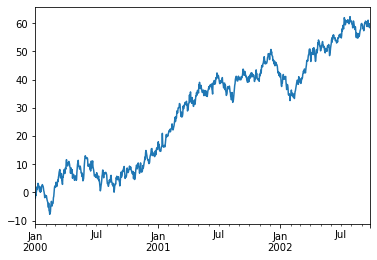

In [127]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

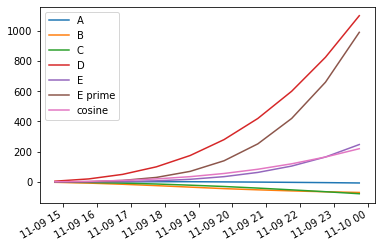

In [130]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')